# Sales Prediction using Python

## Let's load and examine the dataset. 🚀

In [1]:
import pandas as pd

# Load the dataset
file_path = "/Users/DELL/Downloads/Sales Prediction using Python/Advertising.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


(None,
    Unnamed: 0     TV  Radio  Newspaper  Sales
 0           1  230.1   37.8       69.2   22.1
 1           2   44.5   39.3       45.1   10.4
 2           3   17.2   45.9       69.3    9.3
 3           4  151.5   41.3       58.5   18.5
 4           5  180.8   10.8       58.4   12.9)

## Dataset Overview
### The dataset contains 200 entries and 5 columns:

1. Unnamed: 0 – Index column (can be dropped).
2. TV – Advertising budget for TV (in $1000s).
3. Radio – Advertising budget for Radio (in $1000s).
4. Newspaper – Advertising budget for Newspaper (in $1000s).
5. Sales – Sales generated (in $1000s). (Target variable for prediction)
#### Since all columns except the index are numerical, we can proceed with data preprocessing and exploratory data analysis (EDA).

### Next Steps:

1. Drop the unnecessary column (Unnamed: 0).

2. Perform exploratory data analysis (EDA) using statistics and visualizations.

3. Train a machine learning model (e.g., Linear Regression) to predict Sales.
### Let's start with EDA! 📊 ​

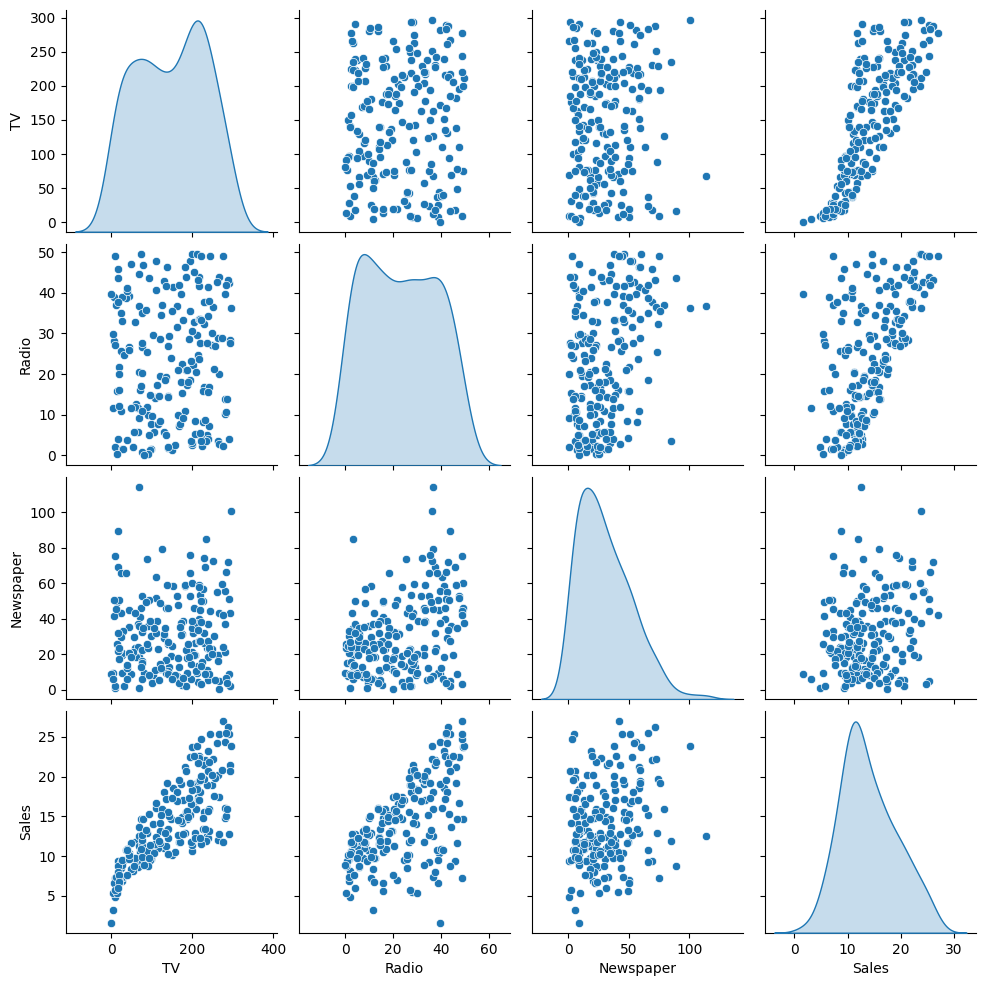

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the unnecessary column
df = df.drop(columns=["Unnamed: 0"])

# Summary statistics
summary_stats = df.describe()

# Pairplot to visualize relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

# Display summary statistics
summary_stats


In [3]:
# Check for non-numeric values
df.dtypes, df.head()


(TV           float64
 Radio        float64
 Newspaper    float64
 Sales        float64
 dtype: object,
       TV  Radio  Newspaper  Sales
 0  230.1   37.8       69.2   22.1
 1   44.5   39.3       45.1   10.4
 2   17.2   45.9       69.3    9.3
 3  151.5   41.3       58.5   18.5
 4  180.8   10.8       58.4   12.9)

### The dataset contains only numeric values, so the issue with the visualization might be due to the kde (Kernel Density Estimation) plot in Seaborn's pairplot. I'll retry using a simpler approach

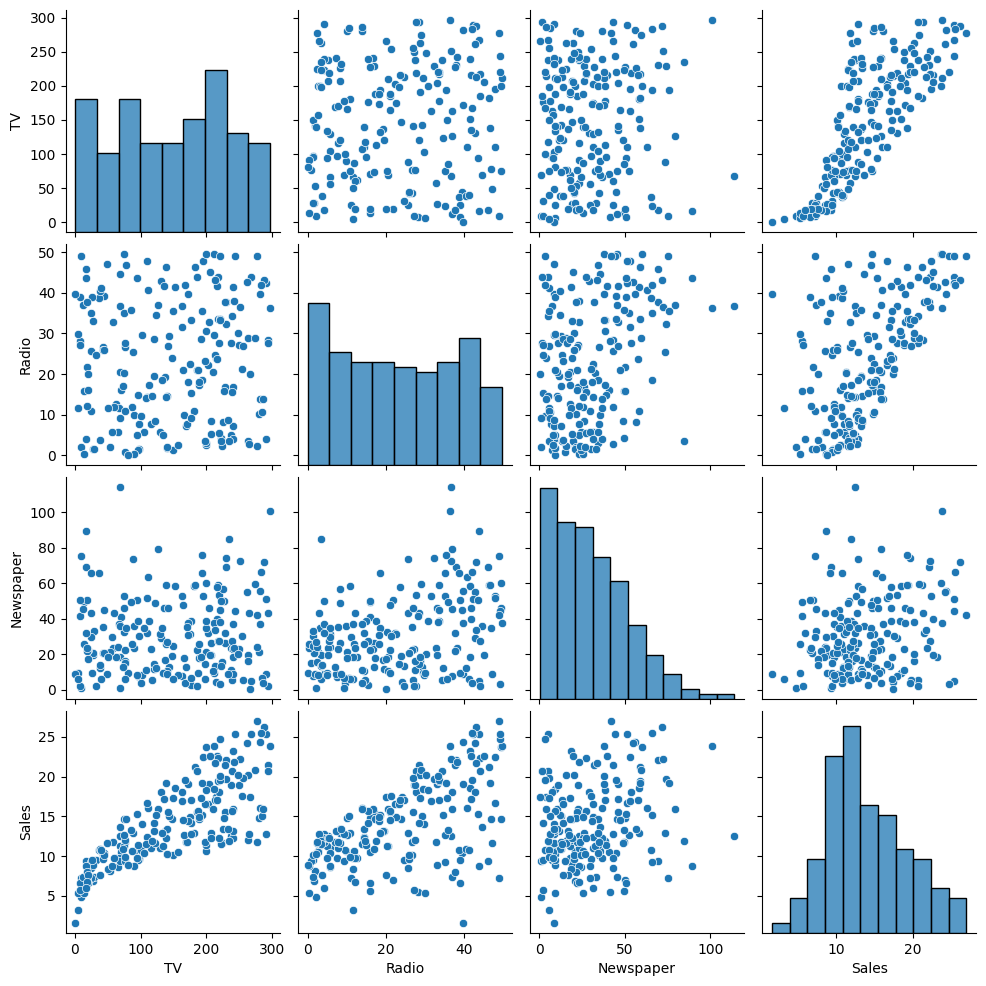

In [4]:
# Generate pairplot without KDE
sns.pairplot(df)
plt.show()


## Here is the pairplot visualization, showing the relationships between TV, Radio, Newspaper, and Sales.

### Observations:
1. TV advertising seems to have a strong positive correlation with Sales.
2. Radio advertising also shows some positive correlation.
3. Newspaper advertising appears to have a weaker impact on Sales.
### Now, let's check the correlation matrix to confirm these insights numerically. 📊 ​

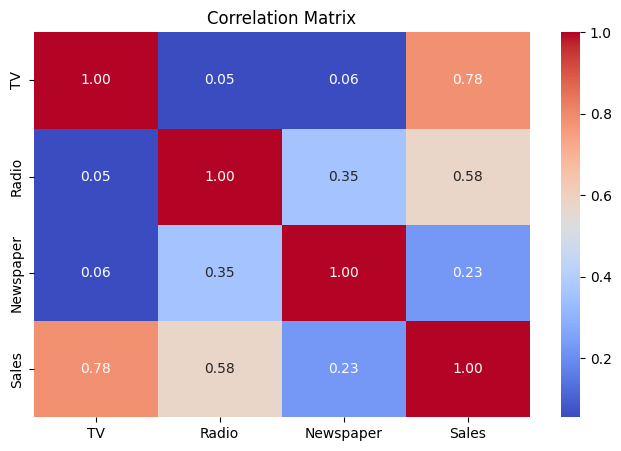

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [6]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Display correlation values
correlation_matrix


## Correlation Analysis:
1. TV & Sales: Strong positive correlation (0.78) → TV ads significantly impact sales.
2. Radio & Sales: Moderate positive correlation (0.58) → Radio ads also influence sales but less than TV.
3. Newspaper & Sales: Weak correlation (0.23) → Newspaper ads have minimal impact on sales.
#### Since TV and Radio advertising are the most influential factors, we can now build a machine learning model (e.g., Linear Regression) to predict sales.

### Next Steps:
1. Prepare the dataset (features & target variable).
2. Split data into training & testing sets.
3. Train a Linear Regression model for prediction.
4. Evaluate the model's performance using metrics.
### Let's proceed! 🚀 ​

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df[["TV", "Radio", "Newspaper"]]  # Features
y = df["Sales"]  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


(1.4607567168117603, 3.1740973539761033, 1.78159966153345, 0.899438024100912)

### Model Performance:
1. Mean Absolute Error (MAE): 1.46 → On average, predictions are off by 1.46 units.
2. Mean Squared Error (MSE): 3.17 → Measures squared differences (lower is better).
3. Root Mean Squared Error (RMSE): 1.78 → Similar to MSE but in the same unit as Sales.
4. R² Score: 0.90 → The model explains 90% of the variance in Sales (very good fit).
### Insights:
1. The model performs well, with TV and Radio being strong predictors of Sales.
2. Newspaper ads contribute less to sales, as seen from the weak correlation.

## ✅ Visualize actual vs. predicted sales

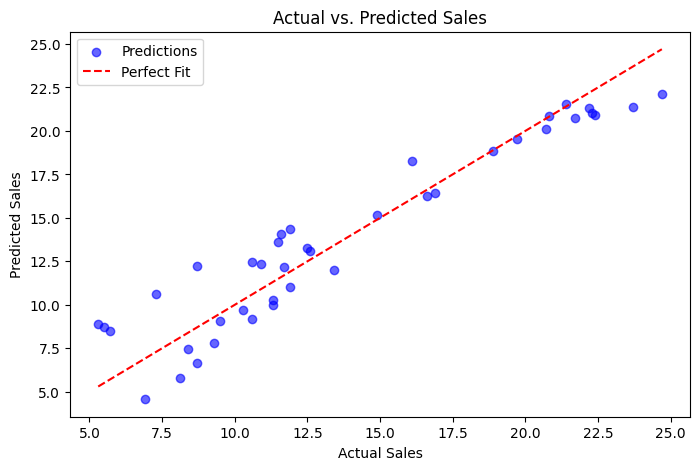

In [8]:
# Visualize actual vs. predicted sales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()
plt.show()


## Here is the Actual vs. Predicted Sales plot:

### Interpretation:
1. The red dashed line represents a perfect prediction (ideal scenario).
2. The blue points are the actual vs. predicted sales values.
### Most points are close to the red line, indicating that the model is making good predictions.

## Conclusion: Sales Prediction Using Machine Learning in Python
#### We successfully built a Linear Regression model to predict Sales based on advertising budgets for TV, Radio, and Newspaper.

### Key Findings:
1. TV advertising has the strongest impact on sales (correlation = 0.78).
2. Radio advertising also contributes significantly (correlation = 0.58).
3. Newspaper advertising has a weak influence on sales (correlation = 0.23).
4. Our Linear Regression model achieved a high accuracy (R² = 0.90), meaning it explains 90% of the variance in Sales.
5. The Actual vs. Predicted Sales plot shows that the model's predictions are quite close to actual sales values.
### Business Implications:
1. Invest more in TV and Radio advertising to maximize sales.
2. Reduce Newspaper ad spending, as it has a minimal impact.
3. Use this model for future budget planning to improve sales performance.